* Иногда я указываю выводы без вывода данных, это происходи из-за их большого объема.
* Так как для отчистки текста (причем одноразовой) скорость не столь важна, то периодически я использую, к примеру, цикл несколько раз, вместо того чтобы исполнить все команды в одном, это сделано для лучшей читаемости кода.

## Импорт библиотек:

In [2]:
!pip3 install missingno

In [3]:
import pandas as pd
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

import ast
import missingno as msno
import re
from collections import Counter
import numpy as np

In [4]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## 1. Изучение данных.

#### Чтение данных.

In [5]:
df = pd.read_csv(r"C:\Programming\Test\parser\Save\book.txt",
                 sep=";",
                 on_bad_lines='skip')
df.columns = [
    "Название", "Автор", "Жанры", "Идентификатор", "Средняя_оценка", "Сайт"
]

#### Пропуски и дубликаты.

In [6]:
df.isnull().sum()

Название          0
Автор             0
Жанры             0
Идентификатор     0
Средняя_оценка    0
Сайт              0
dtype: int64

Дубликаты отследим по уникальному элементу, а именно столбцец сайт.

In [7]:
df['Сайт'].duplicated().sum()

0

Так же нужно проверить уникальность названий у одного и того же автора.

In [8]:
df[['Название', 'Автор']].duplicated().sum()

6

In [9]:
df[df[['Название', 'Автор']].duplicated(keep=False)].sort_values(by='Название')

,Название,Автор,Жанры,Идентификатор,Средняя_оценка,Сайт
217,Адамант Хенны,Ник Перумов,"[['Жанры/поджанры', ' Фэнтези (Героическое фэнтези | «Классическое» фэнтези | Эпическое фэнтези )'], ['Общие характеристики', ' Приключенческое '], ['Место действия', ' Вторичный литературный мир '], ['Время действия', ' Неопределенное время действия '], ['Сюжетные ходы', ' Путешествие к особой цели | Спасение мира | Становление/взросление героя '], ['Возраст читателя', ' Любой ']]","[['wg p10', '142 из 142'], ['wg-sub p7', '105 из 142'], ['wg-sub p7', '103 из 142'], ['wg-sub p6', '83 из 142'], ['wg p10', '139 из 142'], ['wg p9', '122 из 142'], ['wg p6', '90 из 142'], ['wg p9', '127 из 142'], ['wg p8', '113 из 142'], ['wg p7', '96 из 142'], ['wg p9', '133 из 142']]",Средняя оценка:6.89 Оценок:3500 Моя оценка: -,https://fantlab.ru/work1159
8958,Адамант Хенны,Ник Перумов,"[['Жанры/поджанры', ' Фэнтези (Героическое фэнтези | «Классическое» фэнтези )'], ['Общие характеристики', ' Приключенческое | Военное '], ['Место действия', ' Другой мир, не связанный с нашим '], ['Время действия', ' Неопределенное время действия '], ['Сюжетные ходы', ' Путешествие к особой цели | Артефакты '], ['Линейность сюжета', ' Линейно-параллельный | Линейный с экскурсами '], ['Возраст читателя', ' Любой ']]","[['wg p10', '8 из 8'], ['wg-sub p9', '7 из 8'], ['wg-sub p5', '4 из 8'], ['wg p10', '8 из 8'], ['wg p5', '4 из 8'], ['wg p8', '6 из 8'], ['wg p9', '7 из 8'], ['wg p9', '7 из 8'], ['wg p8', '6 из 8'], ['wg p9', '7 из 8'], ['wg p6', '5 из 8'], ['wg p10', '8 из 8']]",Средняя оценка:7.18 Оценок:116 Моя оценка: -,https://fantlab.ru/work1088908
5387,Ловец видений,Сергей Лукьяненко,"[['Жанры/поджанры', ' Фэнтези (Героическое фэнтези | Городское фэнтези )'], ['Общие характеристики', ' Приключенческое '], ['Место действия', ' Параллельный мир/вселенная '], ['Время действия', ' 21 век '], ['Сюжетные ходы', ' Артефакты | Сновидения, формы изменения сознания | Путешествие к особой цели '], ['Линейность сюжета', ' Линейный '], ['Возраст читателя', ' Любой ']]","[['wg p10', '24 из 24'], ['wg-sub p8', '20 из 24'], ['wg-sub p4', '9 из 24'], ['wg p9', '22 из 24'], ['wg p9', '21 из 24'], ['wg p8', '19 из 24'], ['wg p10', '23 из 24'], ['wg p10', '23 из 24'], ['wg p8', '20 из 24'], ['wg p9', '22 из 24'], ['wg p7', '17 из 24']]",Средняя оценка:6.55 Оценок:232 Моя оценка: -,https://fantlab.ru/work138794
5775,Ловец видений,Сергей Лукьяненко,"[['Жанры/поджанры', ' Фантастика («Мягкая» (гуманитарная) научная фантастика )'], ['Общие характеристики', ' Приключенческое '], ['Место действия', ' Наш мир (Земля) (Не определено )'], ['Время действия', ' Далёкое будущее '], ['Сюжетные ходы', ' Бессмертие '], ['Линейность сюжета', ' Линейный '], ['Возраст читателя', ' Любой ']]","[['wg p10', '9 из 9'], ['wg-sub p7', '6 из 9'], ['wg p9', '8 из 9'], ['wg p7', '6 из 9'], ['wg-sub p3', '3 из 9'], ['wg p7', '6 из 9'], ['wg p6', '5 из 9'], ['wg p8', '7 из 9'], ['wg p9', '8 из 9']]",Средняя оценка:7.91 Оценок:328 Моя оценка: -,https://fantlab.ru/work180759
1356,Печать скорби,Александр Бушков,"[['Жанры/поджанры', ' Фэнтези (Героическое фэнтези | Научное фэнтези )'], ['Общие характеристики', ' Приключенческое '], ['Место действия', ' Наш мир (Земля) (Россия/СССР/Русь | Африка )'], ['Время действия', ' 21 век '], ['Сюжетные ходы', ' Путешествие к особой цели | Спасение мира '], ['Возраст читателя', ' Любой ']]","[['wg p10', '22 из 22'], ['wg-sub p9', '20 из 22'], ['wg-sub p5', '10 из 22'], ['wg p10', '21 из 22'], ['wg p9', '20 из 22'], ['wg-sub p9', '20 из 22'], ['wg-sub p7', '16 из 22'], ['wg p9', '20 из 22'], ['wg p9', '19 из 22'], ['wg p7', '16 из 22'], ['wg p7', '15 из 22']]",Средняя оценка:5.70 Оценок:580 Моя оценка: -,https://fantlab.ru/work7749
8507,Печать скорби,Александр Бушков,"[['Жанры/поджанры', ' Фэнтези (Героическое фэнтези )'], ['Общие характеристики', ' Приключенческое '], ['Место действия', ' Наш мир (Земля) (Россия/СССР/Русь | Африка )'], ['Время действия', ' 21 век '], ['Сюжетные ходы', 

Все можно удалить или автоматически отредактировать, но так как здесь всего 6 записей лучше пройтись по книгам вручную.  

**Что мы обнаружили (слева индексы):**
* 8958 - книга первая
* 217 - книга третья
* 5775 - не законченая сетевая публикация
* 8507 - первая книга в одноименном сборнике
* 4226 - не полная версия романа
* 5621 - не полная версия романа
* 3541 - версия до редакции

In [10]:
df.at[8958, 'Название'] += 'книга первая'
df.at[217, 'Название'] += 'книга третья'
df = df.drop(index=[5775, 8507, 4226, 5621, 3541]).reset_index(drop=True)

## 2. Преобразование параметров.

### Столбец "Жанры"

#### Разделение столбца "жанры":

Преобразуем столбец из str в list.

In [12]:
df['Жанры'] = df['Жанры'].apply(lambda x: ast.literal_eval(x.replace('|', ',')))

К сожалению сейчас и далее нам придется проводить разбивку в ручную, так как в тексте нет четкой структуры для простой работы с регулярными выражениями. (Я пытался создать условия во время парсинга, но сталкивался с множеством ошибок из-за многоуровневой верстки и её изменении на разных страницах).

Разобьём столбец.

Для этого вначале создадим столбцы (чтобы после их изменить). 

In [13]:
df['Жанры/поджанры'] = None
df['Общие_характеристики'] = None
df['Место_действия'] = None
df['Время_действия'] = None
df['Сюжетные_ходы'] = None
df['Линейность_сюжета'] = None
df['Возраст_читателя'] = None

In [14]:
for i in range(0, df['Жанры'].shape[0]):
    for book in df.at[i,'Жанры']:
        if book[0] == 'Жанры/поджанры':
            df.at[i,'Жанры/поджанры'] = book[1:]
        elif book[0] == 'Общие характеристики':
            df.at[i,'Общие_характеристики'] = book[1:]
        elif book[0] == 'Место действия':
            df.at[i,'Место_действия'] = book[1:]
        elif book[0] == 'Время действия':
            df.at[i,'Время_действия'] = book[1:]
        elif book[0] == 'Сюжетные ходы':
            df.at[i,'Сюжетные_ходы'] = book[1:]
        elif book[0] == 'Линейность сюжета':
            df.at[i,'Линейность_сюжета'] = book[1:]
        elif book[0] == 'Возраст читателя':
            df.at[i,'Возраст_читателя'] = book[1:]        

Теперь нам не нужен параметр "Жанры".

In [15]:
df.drop('Жанры', axis=1, inplace=True)

#### Обрабатываем только что полученные столбцы:

In [16]:
df.isnull().sum()

Название                  0
Автор                     0
Идентификатор             0
Средняя_оценка            0
Сайт                      0
Жанры/поджанры            3
Общие_характеристики      6
Место_действия           36
Время_действия          109
Сюжетные_ходы           386
Линейность_сюжета       434
Возраст_читателя        209
dtype: int64

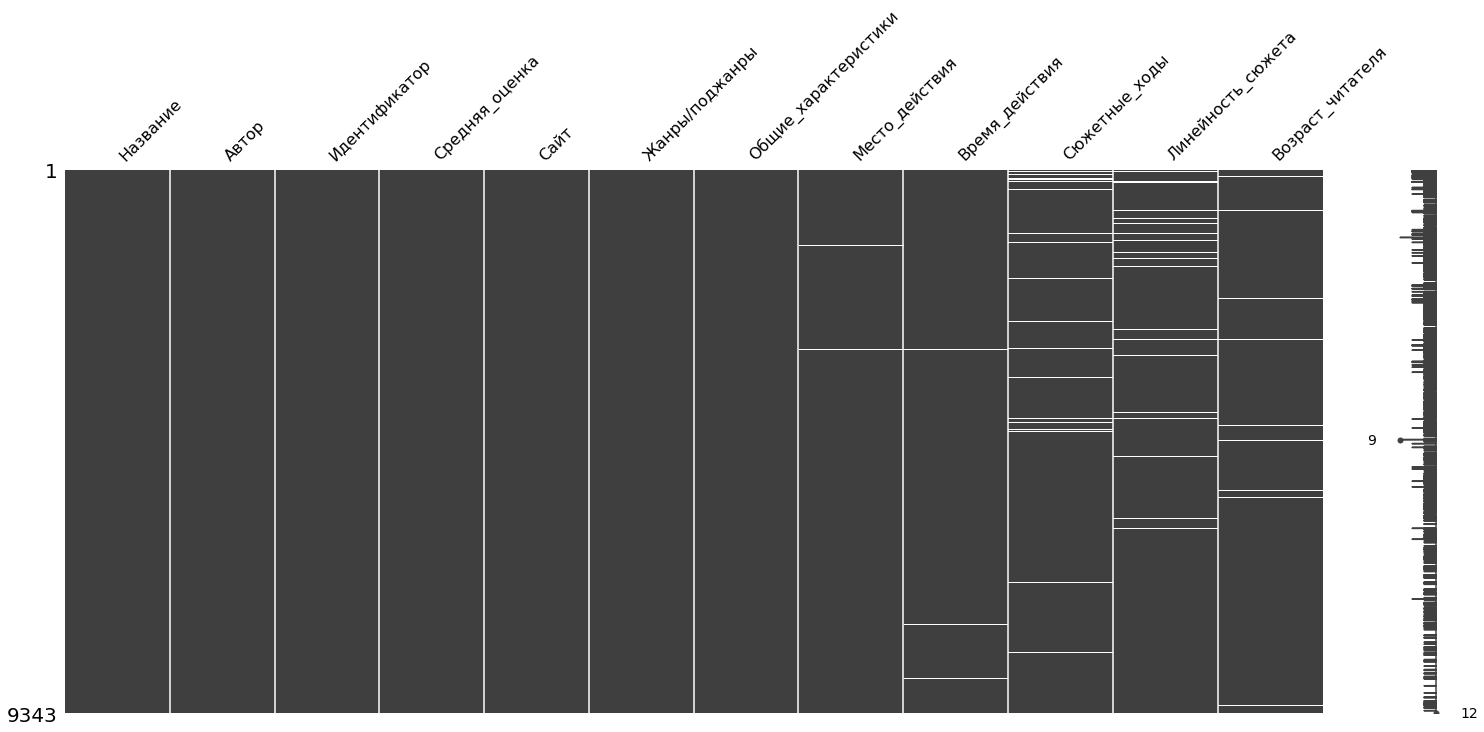

In [17]:
msno.matrix(df);

В столбцах "Жанры/поджанры" лишь несколько пропусков, их можно заполнить вручную используя интернет.

**Пропуски:**

In [18]:
df[df['Жанры/поджанры'].isnull()]

,Название,Автор,Идентификатор,Средняя_оценка,Сайт,Жанры/поджанры,Общие_характеристики,Место_действия,Время_действия,Сюжетные_ходы,Линейность_сюжета,Возраст_читателя
608,дом на розенштрассе,майкл муркок,"[['wg p9', '6 из 7'], ['wg p7', '5 из 7'], ['wg p9', '6 из 7'], ['wg-sub p7', '5 из 7'], ['wg-sub p3', '2 из 7'], ['wg-sub p6', '4 из 7'], ['wg p10', '7 из 7'], ['wg p6', '4 из 7'], ['wg p10', '7 из 7'], ['wg p6', '4 из 7']]",Средняя оценка:7.15 Оценок:77 Моя оценка: -,https://fantlab.ru/work3348,None,"[ Эротическое , Психологическое ]","[ Наш мир (Земля) (Европа (Центральная ) , Не найденные (вымышленные) континенты, земли, страны )]",[ 20 век ],[ Становление/взросление героя ],[ Линейный с экскурсами ],[ Для взрослых ]
6317,потерянный горизонт,джеймс хилтон,"[['wg p9', '8 из 9'], ['wg p8', '7 из 9'], ['wg p7', '6 из 9'], ['wg p10', '9 из 9'], ['wg-sub p8', '7 из 9'], ['wg-sub p8', '7 из 9'], ['wg-sub p7', '6 из 9'], ['wg p10', '9 из 9'], ['wg p9', '8 из 9'], ['wg p9', '8 из 9'], ['wg p8', '7 из 9']]",Средняя оценка:7.79 Оценок:28 Моя оценка: -,https://fantlab.ru/work245406,None,"[ Философское , Психологическое , Приключенческое ]","[ Наш мир (Земля) (Азия (Центральная Азия ) , Не найденные (вымышленные) континенты, земли, страны )]",[ 20 век ],[ Бессмертие ],[ Линейный ],[ Любой ]
8737,косплей сергея юркина. трени-ян,андрей кощиенко,"[['wg p8', '12 из 16'], ['wg p7', '11 из 16'], ['wg p7', '11 из 16'], ['wg p6', '9 из 16'], ['wg p9', '15 из 16'], ['wg-sub p8', '13 из 16'], ['wg-sub p8', '13 из 16'], ['wg p10', '16 из 16'], ['wg p9', '15 из 16'], ['wg p9', '14 из 16'], ['wg p9', '14 из 16'], ['wg-sub p9', '14 из 16'], ['wg p8', '12 из 16'], ['wg p7', '11 из 16'], ['wg p10', '16 из 16']]",Средняя оценка:8.32 Оценок:211 Моя оценка: -,https://fantlab.ru/work966331,None,"[ Социальное , Ироническое , Семейно-бытовое , Производственное ]",[ Альтернативная история нашего мира (Земли) (Азия (Восточная Азия ))],[ 21 век ],"[ Обмен разумов, перемещение разума , Обучение в школе/академии/ВУЗе , Путешественники (попаданцы) (в другой мир ) , Становление/взросление героя ]",[ Линейный с экскурсами ],[ Любой ]


In [19]:
df.iloc[608]['Жанры/поджанры'] = ['Фантастика', 'Любовный роман']
df.iloc[6321]['Жанры/поджанры'] = ['Фэнтези','Мифологическое']
df.iloc[8742]['Жанры/поджанры'] = ['Фантастика']

----

Исследовав остальные параметры мы можем предположить, что у них нет корреляции с известными нам параметрами, однако удалить (они занимают более 10% всего объема датасета) или просто оставить их (мешают обработке данных + с ними модель не построишь) мы не можем, придётся заменить их всех на значение "Неизвестно", можно конечно заполнить все пропуски вручную, но 

In [20]:
df.fillna('неизвестно', inplace=True)

---

#### Преобразем параметры в списки:

In [21]:
def list_text(book):
    if type(book) == str:
        return book
    # Заменим скобки на ',', разделяем данные по ','
    text = [re.sub(r'[,()]', ',', i).split(',') for i in book]
    text = [i.split('  ') for l in text for i in l]

    # Удаляем пробелы перед и до элементами
    text = [book.strip() for l in text for book in l]

    # Удаление пропущенных элементов
    text = list(filter(None, text))
    return text

**Жанры/поджанры**

In [22]:
df['Жанры/поджанры'] = df['Жанры/поджанры'].apply(list_text)

---

In [23]:
# Соединяем объект и категорию.
def categories(s):
    def expand(m):
        prefix, suffixes = m.groups()
        return ",".join(f"{prefix}_{suffix}"
                        for suffix in map(str.strip, suffixes.split(",")))

    while '(' in s:
        s = re.sub(r"(\w*\s*\w+)\s*\(([^()]+)\)", expand, s)

    return s

In [24]:
def list_gchar(book):
    if type(book) == str:
        return book
    # Удаляем скобки создавая категорию и объектазделяем дынные по ','
    text = [categories(i).split(',') for i in book]

    # Объединим списки + удаляем пробелы в скобках.
    text = [
        book.replace('  ', ' ').replace(' ', '_').strip('_')
        for l in text for book in l
    ]

    # Удаление пропущенных элементов
    text = list(filter(None, text))
    return text

**Общие_характеристики**

In [25]:
df['Общие_характеристики'] = df['Общие_характеристики'].apply(list_gchar)

**Место_действия**

In [26]:
df['Место_действия'] = df['Место_действия'].apply(list_text)

**Время_действия**

In [27]:
df['Время_действия'] = df['Время_действия'].apply(list_text)

**Сюжетные_ходы**

In [28]:
df['Сюжетные_ходы'] = df['Сюжетные_ходы'].apply(list_text)

**Линейность_сюжета**

In [29]:
df['Линейность_сюжета'] = df['Линейность_сюжета'].apply(list_text)

**Возраст_читателя**

In [30]:
df['Возраст_читателя'] = df['Возраст_читателя'].apply(list_text)

In [31]:
col_edit = [
    'Время_действия', 'Жанры/поджанры', 'Общие_характеристики',
    'Место_действия', 'Сюжетные_ходы', 'Линейность_сюжета', 'Возраст_читателя'
]

### Столбец "Средняя_оценка"

Разделим столбец **"Средняя_оценка"** на **"Кол-во_оценок"** и **"Средняя_оценка"**.

In [32]:
df['Средняя_оценка'] = df['Средняя_оценка'].apply(
    lambda x: ''.join(re.findall('[0-9. ]', x)).split())

In [33]:
df['Кол-во_оценок'] = df['Средняя_оценка'].apply(lambda x: int(x[1]))
df['Средняя_оценка'] = df['Средняя_оценка'].apply(lambda x: float(x[0]))

### Преобразование списков в отдельные параметры

In [34]:
col_edit = [
    'Жанры/поджанры', 'Общие_характеристики', 'Место_действия',
    'Время_действия', 'Сюжетные_ходы', 'Линейность_сюжета', 'Возраст_читателя'
]

In [35]:
def col_create(col_name):
    # Создадим столбцы  каждым параметром из col_name в отдельности со значением 0
    genres = [g for list_g in df[col_name].to_list() for g in list_g if list_g != 'неизвестно']
    genres = list(Counter(genres).keys())
    genres.append('неизвестно')

    # Изменив значение столбцов на 0
    for g in genres:
        df[g] = int(0)

    # Изменив значение столбцов на 1 при наличии в col_name
    for i in range(0, df[col_name].shape[0]):
        for g in genres:
            if g in df.at[i, col_name]:
                df.at[i, g] = 1


for i in col_edit:
    col_create(i)

**Удаление колонок**

In [36]:
df.drop(col_edit, axis=1, inplace=True)

**Редактирование названий колонок**

In [37]:
df.columns = [i.replace(' ', '_').replace('_/_','/').lower() for i in df.columns.to_list()]

## 3. * Отбор признаков

**Удаление параметры (тегов) которые охватывают менее 5% книг.**

Соотношение между кол-вом процентов охвата и процентом оставшихся книг такое:  
7 - 18%  
6 - 20%  
5 - 23%  
4 - 26%  
3 - 28%  
2 - 32%  
1 - 42%  

С одной стороны нам нужно уменьшить число параметров, с друг сохранить релевантные, этот порог будит регулироваться при обучении модели.

In [38]:
# k = 5
# df_passes = (df.loc[:,'фантастика':].sum()/df.shape[0]*100)<= k
# col_passes = df_passes[df_passes==True].index.to_list()
# df.drop(col_passes, axis=1).shape[1]/df.shape[1]

**Удалить параметры с уровнем линейной корреляции выше 95%.**

In [39]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
df.drop(to_drop, axis=1, inplace=True)

### Установка датаcета

In [1]:
# df.to_csv('Data_P.csv')